In [ ]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
from tops.config import instantiate
import pathlib
from ssd.utils import load_config
from plot_utils import plot

In [12]:
task23_iteration1_logs = tops.logger.read_logs(pathlib.Path("/work/snotra/adtan/ssd_outputs/task23_iteration1/"))
task23_iteration2_logs = tops.logger.read_logs(pathlib.Path("/work/snotra/adtan/ssd_outputs/task23_iteration2/"))
task23_iteration3_logs = tops.logger.read_logs(pathlib.Path("/work/snotra/adtan/ssd_outputs/task23_iteration3/"))

list_of_logs = [task23_iteration1_logs, task23_iteration2_logs, task23_iteration3_logs]
labels = ["Task 2.3 iteration 1", "Task 2.3 iteration 2", "Task 2.3 iteration 3"]

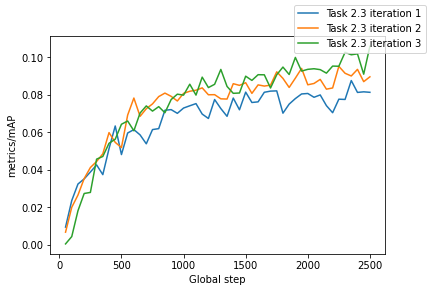

In [13]:
# plot mAP@0.5:0.95
fig, ax = plot(list_of_logs, labels, "metrics/mAP")
fig.legend()

In [ ]:
print("Highest mAP@0.5:0.95 reach for Task 2.3 iteration3: ", max([entry["metrics/mAP"] for entry in task23_iteration3_logs if "metrics/mAP" in entry]))

In [ ]:
# plot regression loss
fig, ax = plot(list_of_logs, labels, "loss/regression_loss")
fig.legend()

In [ ]:
# plot classification loss
fig, ax = plot(list_of_logs, labels, "loss/classification_loss")
fig.legend()

In [ ]:
# plot total loss
fig, ax = plot(list_of_logs, labels, "loss/total_loss")
fig.legend()

In [ ]:
cfg = load_config("../configs/task23_iteration3.py")
model = instantiate(cfg.model)

num_parameters = sum(p.numel() for p in model.parameters())
num_trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total number of parameters: ", num_parameters)
print("Total number of trainable parameters: ", num_trainable_parameters)

In [ ]:
%cd ../configs

In [ ]:
!python ../runtime_analysis.py task23_iteration3.py